In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
url = "/content/drive/MyDrive/insurance.csv"


df = pd.read_csv (url)

In [3]:
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [4]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,1338.0,39.207025,14.049960,18.0000,27.00000,39.000,51.000000,64.00000
bmi,1338.0,30.663397,6.098187,15.9600,26.29625,30.400,34.693750,53.13000
children,1338.0,1.094918,1.205493,0.0000,0.00000,1.000,2.000000,5.00000
charges,1338.0,13270.422265,12110.011237,1121.8739,4740.28715,9382.033,16639.912515,63770.42801


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [7]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [6]:
print("region:", df["region"].unique(), "\n")

region: ['southwest' 'southeast' 'northwest' 'northeast'] 



In [ ]:
variables_Categoricas = []

for col in df.columns:
  #print(col, "->", df[col].dtype  == "object")
  if df[col].dtype == "object" :
   variables_Categoricas.append(col)

df[variables_Categoricas]


In [11]:
variables_numericas = [col for col in df.columns if df[col].dtype != "object"]

df[variables_numericas]

,age,bmi,children,charges
0,19,27.900,0,16884.92400
1,18,33.770,1,1725.55230
2,28,33.000,3,4449.46200
3,33,22.705,0,21984.47061
4,32,28.880,0,3866.85520
...,...,...,...,...
1333,50,30.970,3,10600.54830
1334,18,31.920,0,2205.98080
1335,18,36.850,0,1629.83350
1336,21,25.800,0,2007.94500


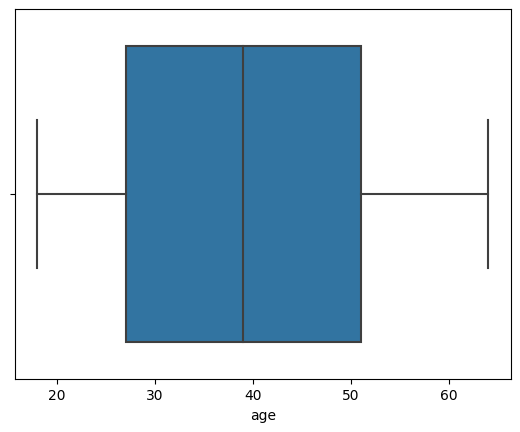

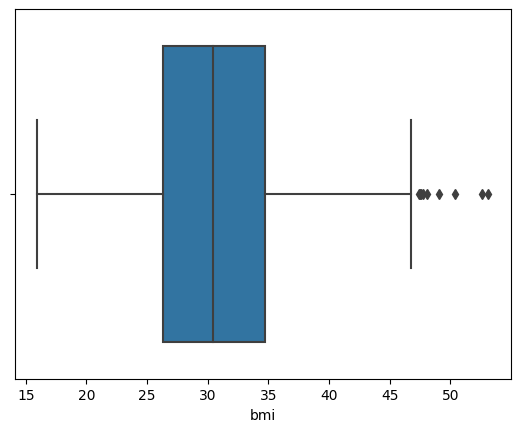

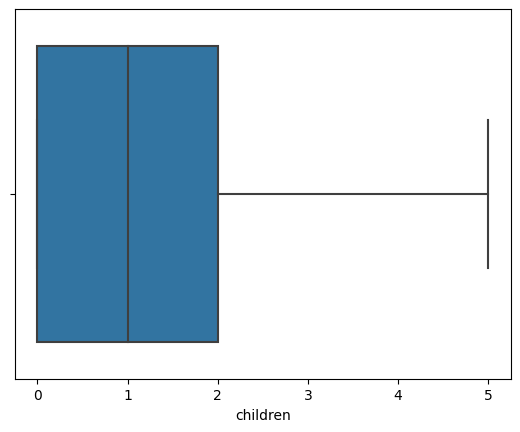

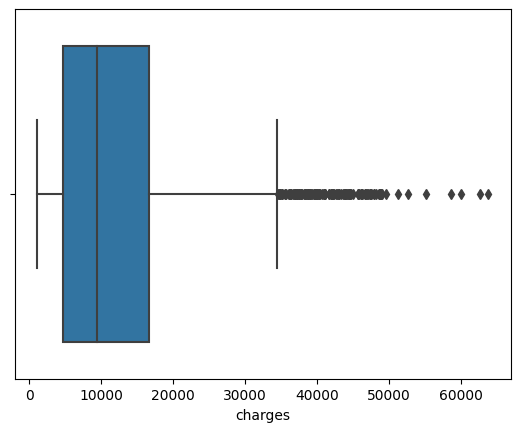

In [13]:
for col in variables_numericas:
  sns.boxplot(x= df[col])
  plt.xlabel(col)
  plt.show()

<ipython-input-27-60801a1b1a63>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["charges"], bins= 30, color = "r", ax = ax)
/usr/local/lib/python3.10/dist-packages/seaborn/distributions.py:2142: UserWarning: `displot` is a figure-level function and does not accept the ax= parameter. You may wish to try histplot.
  warnings.warn(msg, UserWarning)


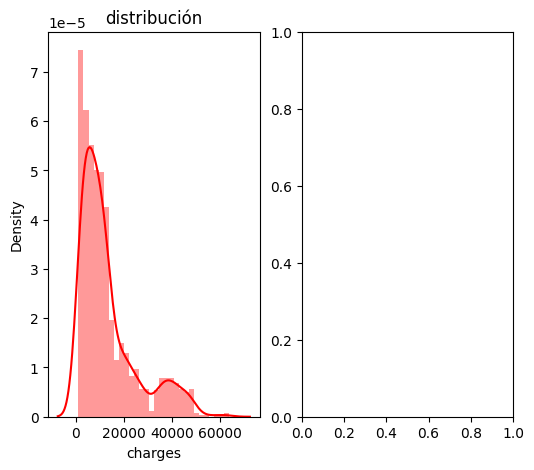

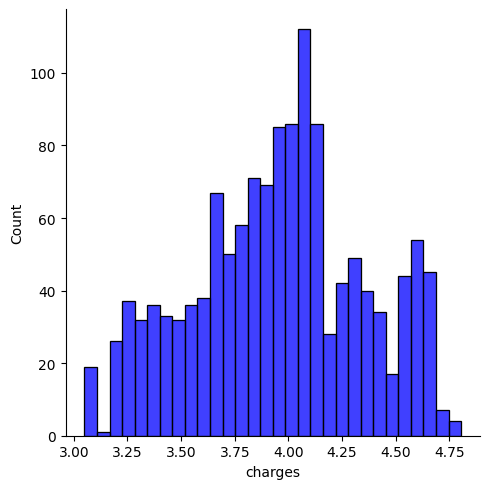

In [27]:
f = plt.figure(figsize=(6,5))


ax = f.add_subplot(121)
sns.distplot(df["charges"], bins= 30, color = "r", ax = ax)
ax.set_title("distribución")
ax = f.add_subplot(122)
sns.displot(np.log10(df["charges"]), bins =30, color ="b", ax=ax)

plt.show()

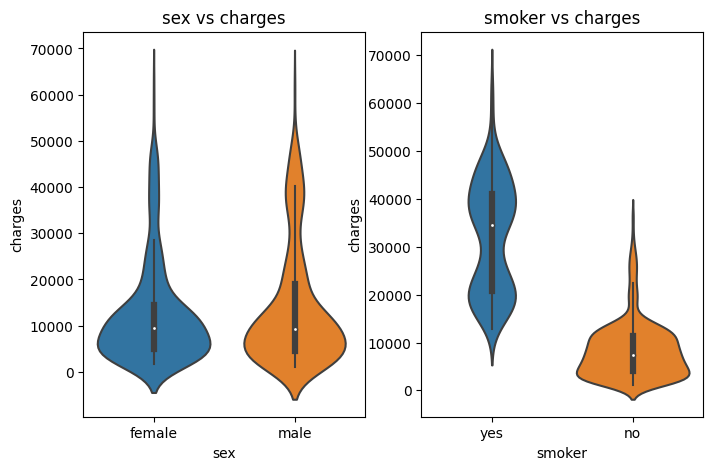

In [25]:
f = plt.figure(figsize=(8,5))


ax = f.add_subplot(121)
sns.violinplot(x ="sex",y="charges", data=df , ax=ax)
ax.set_title("sex vs charges")
ax = f.add_subplot(122)
sns.violinplot(x ="smoker",y="charges", data=df , ax = ax)
ax.set_title("smoker vs charges")
plt.show()

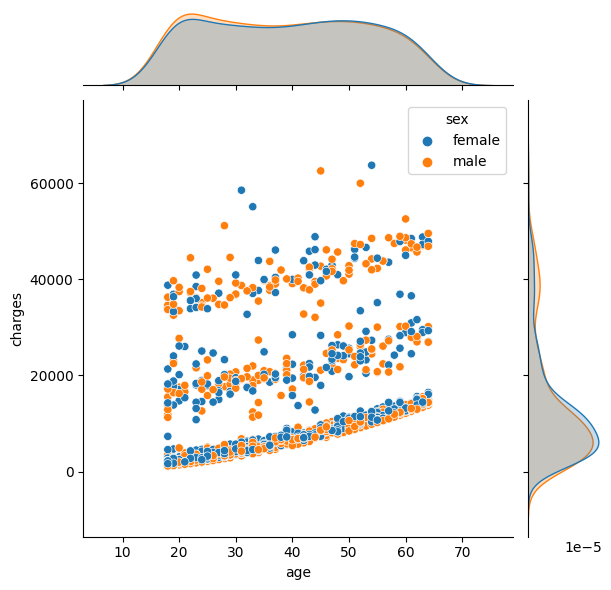

In [30]:
sns.jointplot(x="age", y="charges", data = df, hue ="sex")